## Name:-Shital Ashok Gaikwad

## Project Name:-iris prediction

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [2]:
dataset=pd.read_csv(r"D:\Datasets\Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dataset.shape

(150, 6)

In [5]:
#Check how many null values present in dataset.
dataset.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* There is no null value present in given dataset.

## Exploratory Data Analysis (EDA)

In [7]:
#Basic statistical information about dataset.
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Correlation between each columns of the Dataset.
cor=dataset.corr()
cor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation of Dataset')

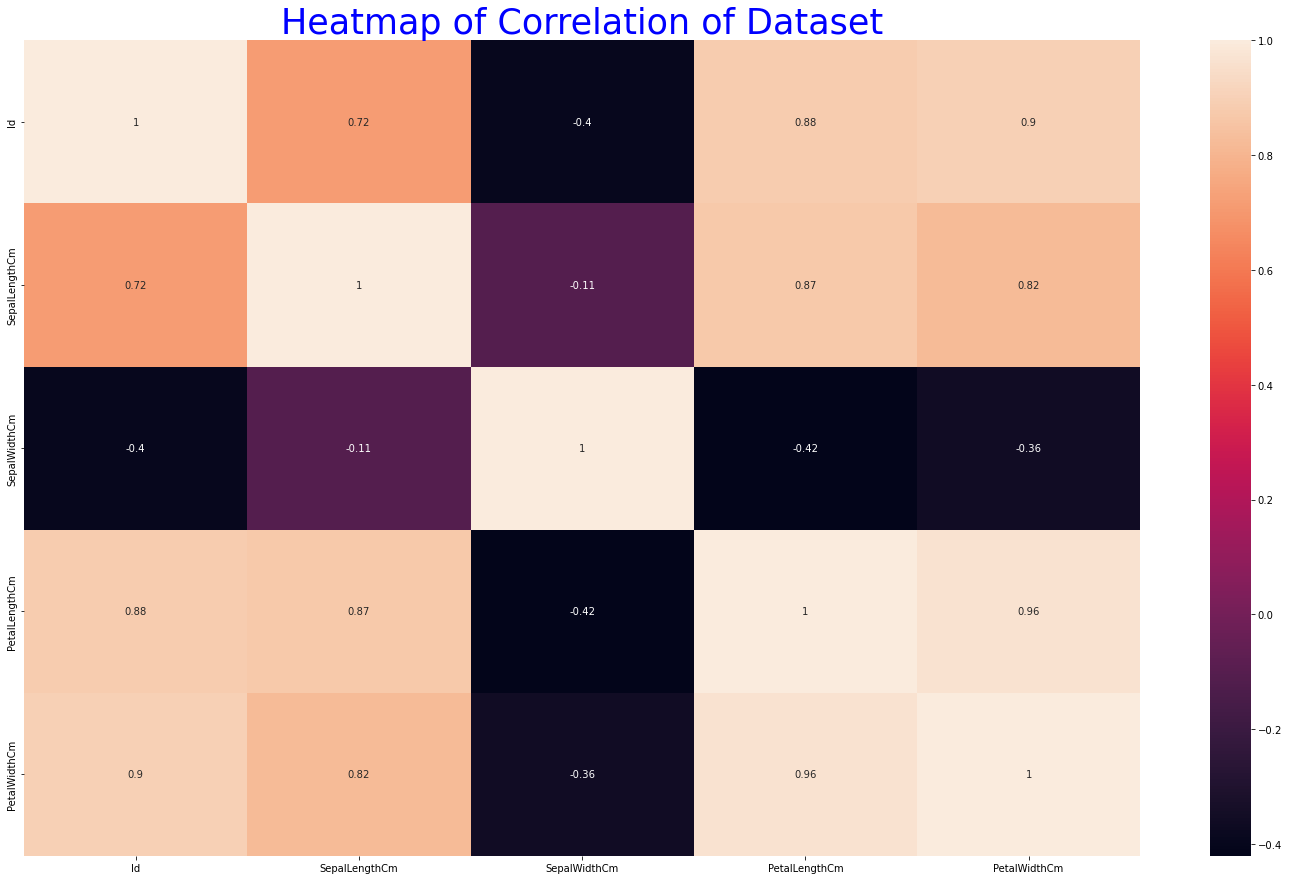

In [9]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True,fmt="0.2g")
plt.title("Heatmap of Correlation of Dataset",fontsize=35,color="blue")

In [10]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


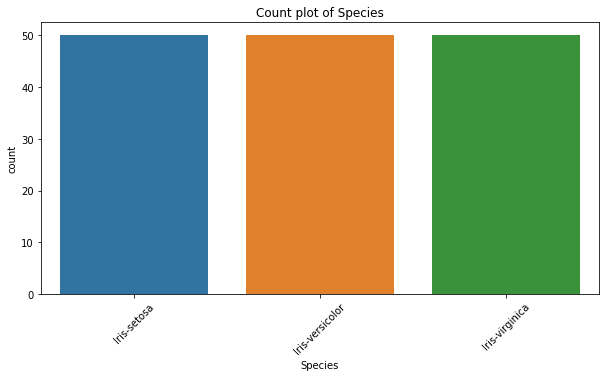

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(dataset["Species"])
plt.title("Count plot of Species")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

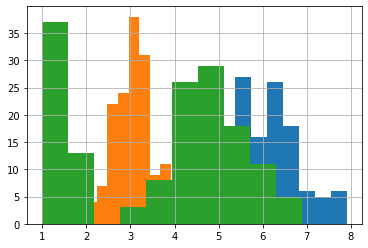

In [12]:
dataset["SepalLengthCm"].hist()
dataset["SepalWidthCm"].hist()
dataset["PetalLengthCm"].hist()

* convert all independent data into one level because in our data set we have same categorical,some
 continous data so we need to convert them into one level.

D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


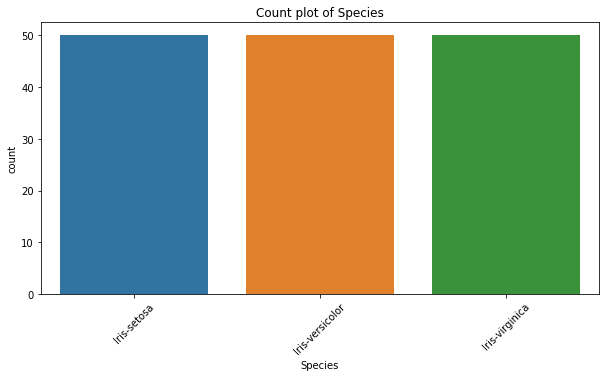

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(dataset["Species"])
plt.title("Count plot of Species")
plt.xticks(rotation=45)
plt.show()

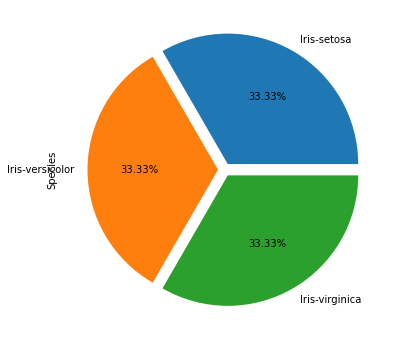

In [14]:
plt.figure(figsize=(10,6))
dataset["Species"].value_counts().plot(kind="pie",autopct="%1.2f%%",explode=[0.05]*3)
plt.show()

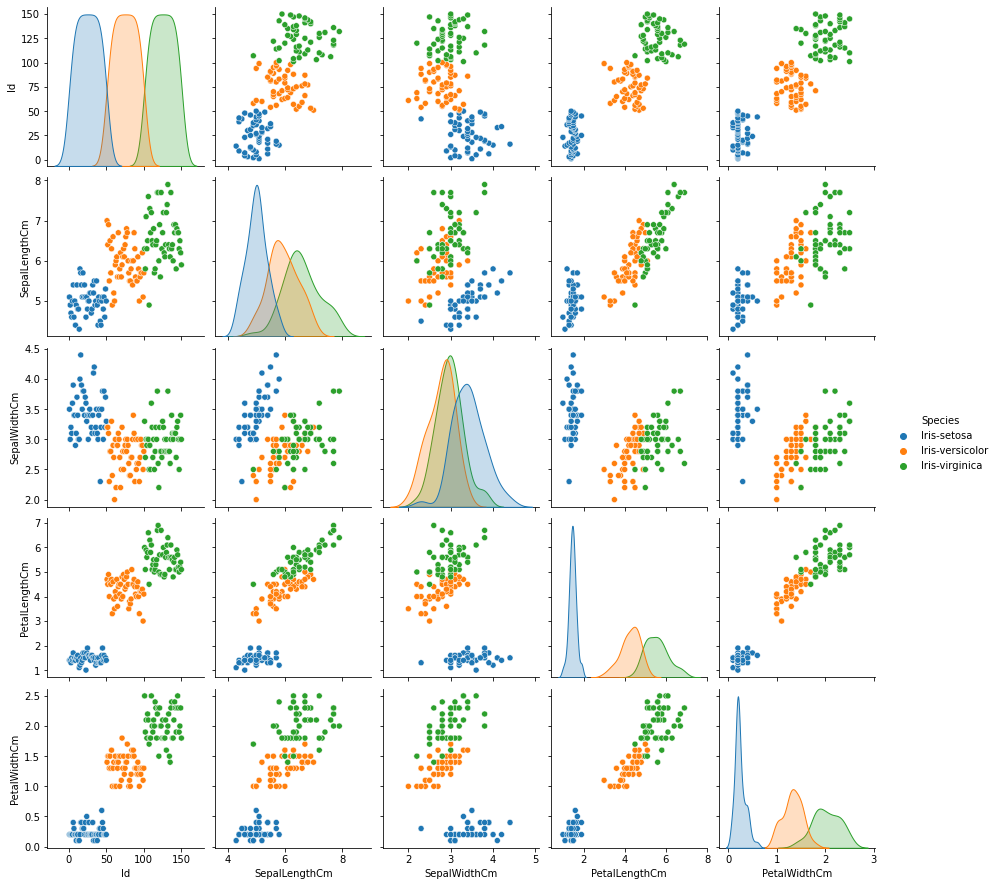

In [15]:
# pairplot is a representation which plots pairwise relationship in the data
sns.pairplot(dataset,hue="Species")

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
dataset["Species"]=le.fit_transform(dataset["Species"])
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


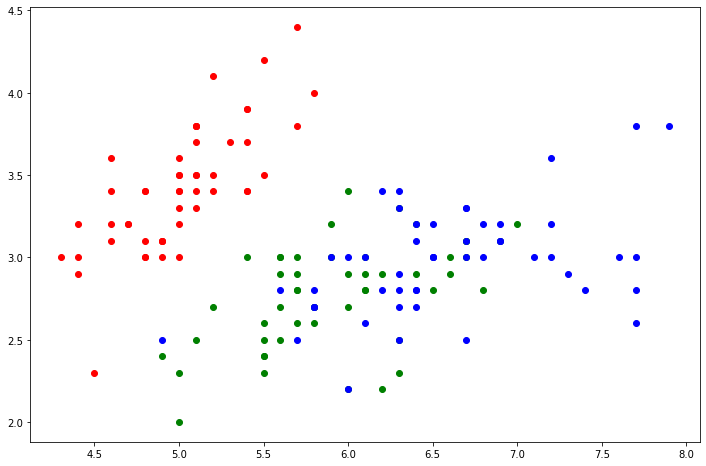

In [18]:
plt.figure(figsize=(12,8))
species1=dataset.loc[(dataset["Species"]==0)]
species2=dataset.loc[(dataset["Species"]==1)]
species3=dataset.loc[(dataset["Species"]==2)]
plt.scatter(species1["SepalLengthCm"],species1["SepalWidthCm"],color="red")
plt.scatter(species2["SepalLengthCm"],species2["SepalWidthCm"],color="green")
plt.scatter(species3["SepalLengthCm"],species3["SepalWidthCm"],color="blue")

## Data seperation in independent and dependent data.

In [19]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [20]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [23]:
model=dt.fit(x_train,y_train)

In [24]:
from sklearn import tree

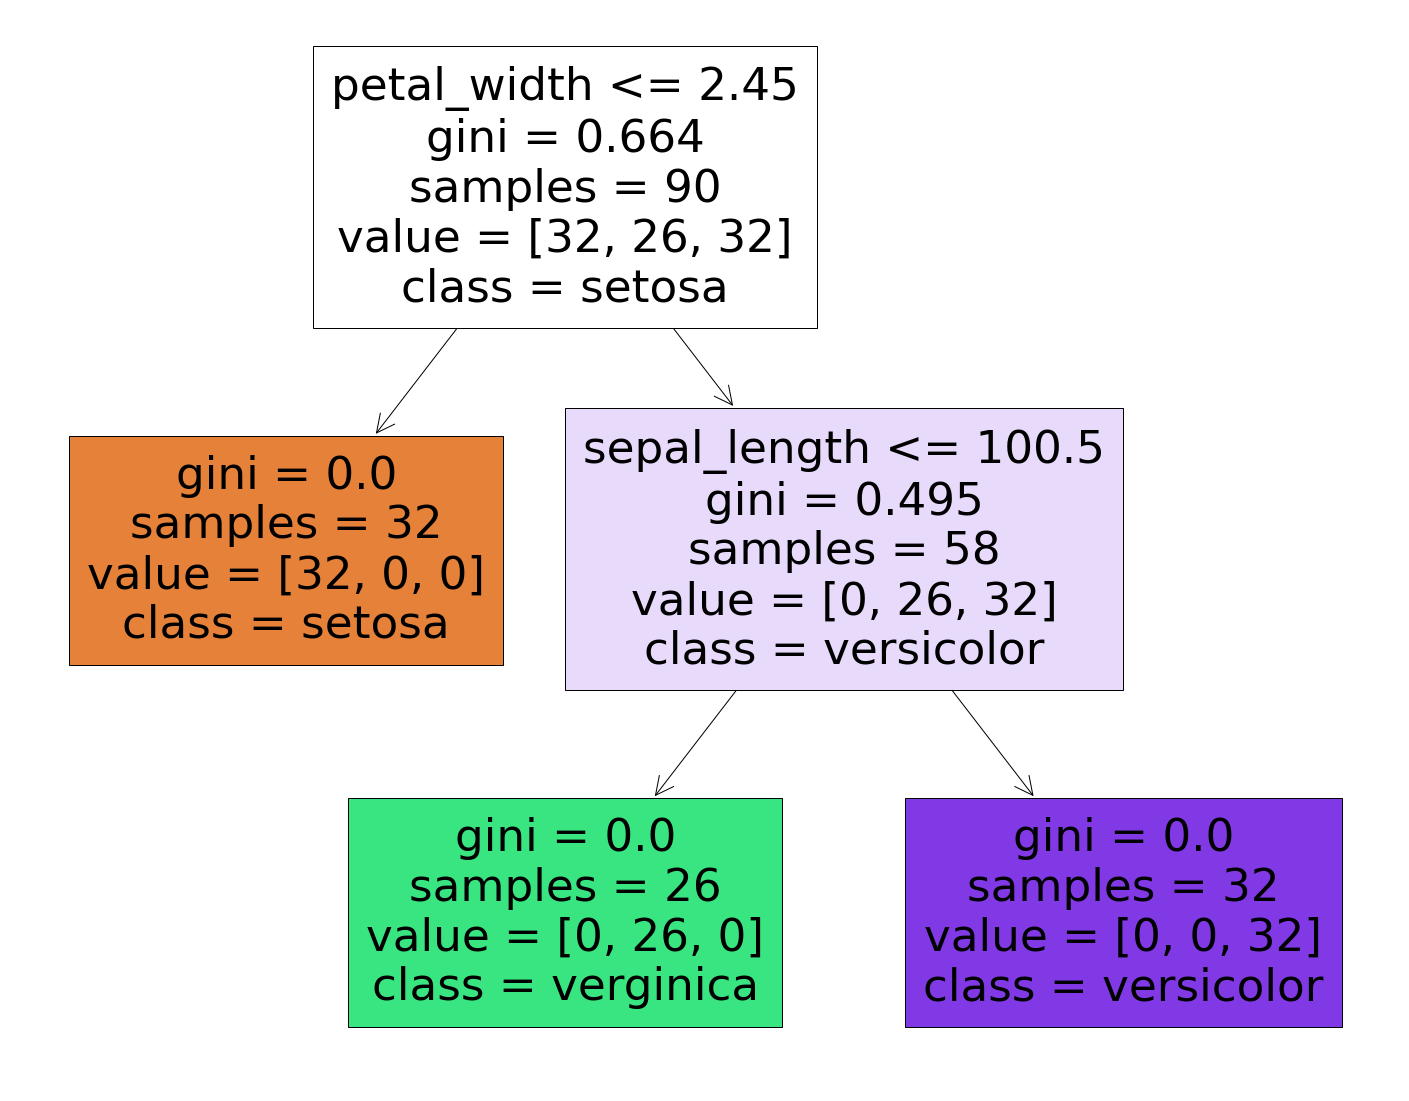

In [25]:
plt.figure(figsize=(25,20))
Grf=tree.plot_tree(model,feature_names=["sepal_length","sepal_width","petal_length","petal_width"],
                       class_names=["setosa","verginica","versicolor"],
                       filled=True)